<a href="https://colab.research.google.com/github/android-kunjapppan/PyTorch-Tutorial/blob/master/PyTorch_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


# 1. Prepare Data

In [30]:
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1,noise=20, random_state=1)

# Converting into torch tensor
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
print(y.shape)

# Reshaping y, making it a coloumn vector
y = y.view(y.shape[0],1)
print(y.shape)

n_samples,n_features=x.shape

torch.Size([100])
torch.Size([100, 1])


# 2. Model

In [32]:
input_size = n_features
output_size = 1

model = nn.Linear(input_size,output_size)

# 3. Loss and Optimizer

In [33]:
learning_rate=0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

# 4. Training Loop

In [39]:
epochs =100
for epoch in range(epochs):
  # Forward Pass
  y_pred = model(x)
  loss = criterion(y, y_pred)

  # backward pass
  loss.backward()

  # Update
  optimizer.step()

  # setting grads to zero after each epoch
  optimizer.zero_grad()

  if (epoch+1)%10 ==0:
    print(f'epoch : {epoch+1}, loss:{loss.item():.4f}')

epoch : 10, loss:1914.1488
epoch : 20, loss:1482.3723
epoch : 30, loss:1169.0594
epoch : 40, loss:941.5142
epoch : 50, loss:776.1284
epoch : 60, loss:655.8356
epoch : 70, loss:568.2826
epoch : 80, loss:504.5201
epoch : 90, loss:458.0576
epoch : 100, loss:424.1841


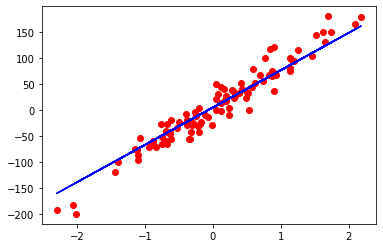

In [40]:
# Plotting
# preveting this predict doesnt come in our computational graph
predicted = model(x).detach() # this will generate a new tensor where our gradient calculating attributes are set to False

plt.plot(x_numpy,y_numpy,'ro')

plt.plot(x_numpy,predicted,'b')
plt.show()